In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark\\spark-3.3.1-bin-hadoop3'

In [2]:
import random
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('SparkApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)


In [3]:
df = spark.read.csv("amazon.csv", header=True)
df_pd = df.toPandas()


In [4]:
df_pd.columns = ['id', 'Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']
df_pd['Reviews'] = df_pd['Reviews'].astype(float)
df_pd['Price'] = df_pd['Price'].astype(float)
df_pd['Year'] = df_pd['Year'].astype(float)
df_pd['User Rating'] = df_pd['User Rating'].astype(float)
df_pd['id'] = df_pd['id'].astype(float)
df_pd_1 = df_pd[['Year', "Reviews"]].groupby(['Year']).mean()
df_pd_1["Year"] = df_pd_1.index

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

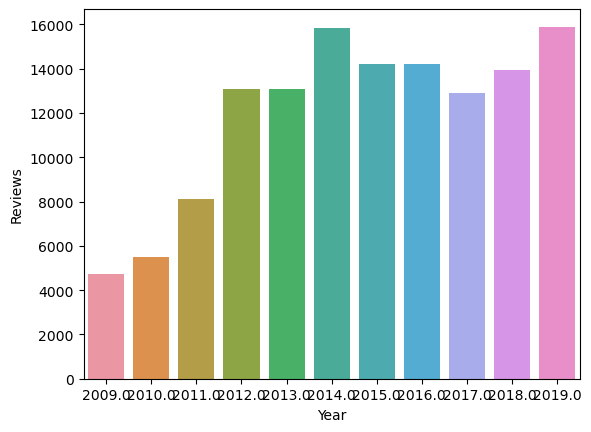

In [5]:
import seaborn as sns
sns.barplot(x=df_pd_1["Year"], y=df_pd_1["Reviews"])

<AxesSubplot:>

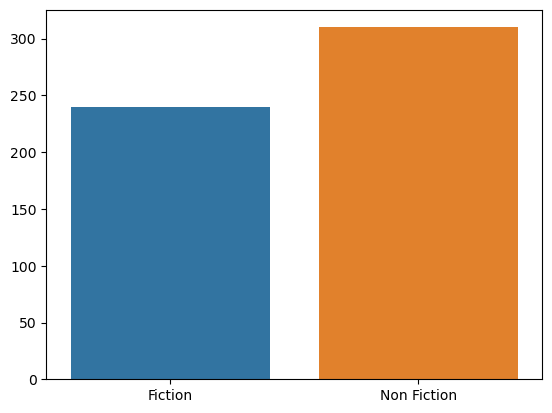

In [6]:
fiction = df_pd[df_pd["Genre"] == "Fiction"].count().id
non_fiction = df_pd[df_pd["Genre"] == "Non Fiction"].count().id
sns.barplot(x=["Fiction", "Non Fiction"], y=[fiction, non_fiction])